In [76]:
import numpy as np
import matplotlib.pyplot as plt

In [77]:
data = np.genfromtxt('data.csv', delimiter=',')
x_data = data[:, 0].tolist()
y_data = data[:, 1].tolist()
N = len(x_data)

print('areas:',x_data)
print('prices:', y_data)
print('data_size:', N)

areas: [6.7, 4.6, 3.5, 5.5]
prices: [9.1, 5.9, 4.6, 6.7]
data_size: 4


In [78]:
def predict(x, w, b):
    return x*w + b

def compute_loss(y_hat, y):
    return abs(y_hat - y)

def compute_gradient(y_hat, y, x):
    dw = x*(y_hat - y) / abs(y_hat - y)
    db = (y_hat - y) / abs(y_hat - y)
    return (dw, db)

def update_weight(w, b, lr, dw, db):
    w_new = w - lr*dw
    b_new = b - lr*db
    return w_new, b_new

In [79]:
# init weight, parameter
epoch_max = 20
lr = 0.01
b = 0.04
w = -0.34
losses = []

In [80]:
# train

for epoch in range(epoch_max):
    # for an epoch
    for i in range(N):
        x = x_data[i]
        y = y_data[i]

        # predict
        y_hat = predict(x, w, b)

        #compute loss
        loss = compute_loss(y_hat, y)

        losses.append(loss)

        # compute gradient
        (dw, db) = compute_gradient(y_hat, y, x)

        #update weight
        (w, b) = update_weight(w, b, lr, dw, db)
print(w,b)

1.1859999999999986 0.34000000000000014


In [81]:
# predict
area_real = 6
w = 1.186
b = 0.34
predict_price = area_real*w + b
print(predict_price)

7.4559999999999995


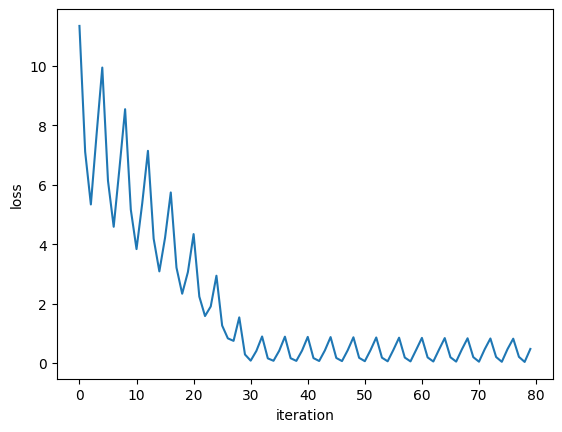

In [82]:
# draw loss
plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

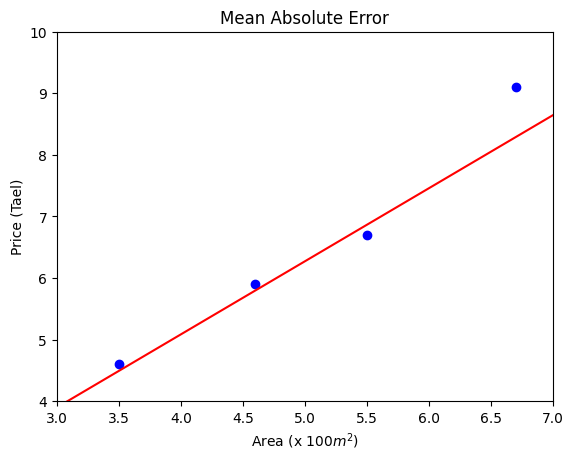

In [84]:
# visualize[]
x_axis = np.arange(2,8)
y_axis = [x*w + b for x in x_axis]
plt.plot(x_axis, y_axis, color = 'r')

plt.scatter(x_data, y_data, color = 'blue')

#--------------------------------------
plt.xlabel('Area (x 100$m^2$)')
plt.ylabel('Price (Tael)')
plt.title('Mean Absolute Error')

plt.xlim(3,7)
plt.ylim(4,10)
plt.show()